In [16]:
from keras.models import Model
from keras.layers import LSTM, Input
from keras.utils.np_utils import to_categorical
from PointerLSTM import PointerLSTM
import numpy as np

from matplotlib import pyplot as plt


In [3]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
filename = 'tsp_data.npz'

In [6]:
# np.savez(filename, X_train=X, y_train=Y, X_test=x_test, y_test=y_test)

In [7]:
data = np.load(filename)

X_train = data['X_train']
y_train = data['y_train']

X_test = data['X_test']
y_test = data['y_test']

In [8]:
X_train.shape, y_train.shape

((10000, 10, 2), (10000, 10))

In [9]:
X_test.shape, y_test.shape

((1000, 10, 2), (1000, 10))

In [10]:
y_train_cat = to_categorical(y_train)
y_train_cat.shape

(10000, 10, 10)

In [12]:
seq_shape = X_test.shape[1:]
hidden_units = 64

main_input = Input(shape=seq_shape, name='main_input')
encoder,state_h, state_c = LSTM(hidden_units, name='encoder', return_sequences=True, return_state=True) (main_input)
decoder = PointerLSTM(hidden_units, name='decoder') (encoder, states=[state_h, state_c])

model = Model(main_input, decoder)
print(model.summary())

2021-12-16 15:15:33.110537: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 10, 2)]      0           []                               
                                                                                                  
 encoder (LSTM)                 [(None, 10, 64),     17152       ['main_input[0][0]']             
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                                  
 decoder (PointerLSTM)          (None, 10, 10)       41280       ['encoder[0][0]',                
                                                                  'encoder[0][1]',            

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
nb_epochs = 100
h = model.fit(X_train, y_train_cat, epochs=nb_epochs, batch_size=64)

Epoch 1/100
157/157 [==============================] - 9s 22ms/step - loss: 2.0370 - accuracy: 0.1991
Epoch 2/100
157/157 [==============================] - 3s 21ms/step - loss: 1.9743 - accuracy: 0.2117
Epoch 3/100
157/157 [==============================] - 4s 24ms/step - loss: 1.9684 - accuracy: 0.2142
Epoch 4/100
157/157 [==============================] - 4s 23ms/step - loss: 1.9530 - accuracy: 0.2344
Epoch 5/100
157/157 [==============================] - 4s 23ms/step - loss: 1.8028 - accuracy: 0.2918
Epoch 6/100
157/157 [==============================] - 4s 23ms/step - loss: 1.6549 - accuracy: 0.3329
Epoch 7/100
157/157 [==============================] - 4s 25ms/step - loss: 1.5857 - accuracy: 0.3574
Epoch 8/100
157/157 [==============================] - 4s 26ms/step - loss: 1.5487 - accuracy: 0.3707
Epoch 9/100
157/157 [==============================] - 4s 26ms/step - loss: 1.5205 - accuracy: 0.3784
Epoch 10/100
157/157 [==============================] - 4s 28ms/step - loss: 1.507

In [20]:
model.save_weights('model_weight_100.hdf5')

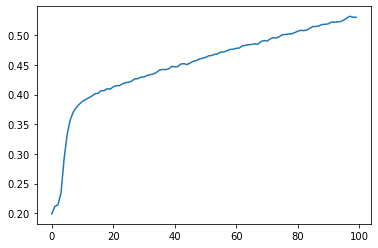

In [17]:
plt.plot(h.history['accuracy'])

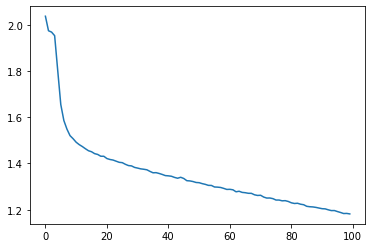

In [18]:
plt.plot(h.history['loss'])

In [21]:

model.evaluate(X_test, to_categorical(y_test))

32/32 [==============================] - 2s 5ms/step - loss: 1.3520 - accuracy: 0.4634


[1.3519991636276245, 0.4634000062942505]

In [37]:
model.predict(X_test[:2]).argmax(axis=2)

array([[0, 2, 3, 3, 7, 1, 5, 3, 6, 8],
       [0, 6, 2, 7, 9, 5, 5, 4, 2, 6]])

In [34]:
y_test[:2]

array([[0, 2, 8, 3, 1, 7, 4, 5, 6, 9],
       [0, 6, 2, 8, 4, 5, 9, 7, 3, 1]])